<a href="https://colab.research.google.com/github/samikshyasanskruti/Pinnacle_AI_Projects/blob/main/Resume_Parser/Resume_Parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install flask pdfplumber python-docx spacy nltk python-magic
!python -m spacy download en_core_web_sm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
import re, os, json, pdfplumber, docx
import spacy
from nltk.tokenize import sent_tokenize
from collections import defaultdict

nlp = spacy.load("en_core_web_sm")

# Function to extract text from PDF/DOCX
def extract_text(file_path):
    text = ""
    if file_path.endswith(".pdf"):
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                text += page.extract_text() + "\n"
    elif file_path.endswith(".docx"):
        text = docx2txt.process(file_path)
    else:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
    return text

# Skills database (expandable)
SKILLS_DB = {"python","java","c++","c#","javascript","typescript","react",
             "angular","nodejs","express","flask","django","pandas","numpy",
             "scikit-learn","tensorflow","keras","pytorch","machine learning",
             "deep learning","nlp","computer vision","sql","mysql","postgresql",
             "mongodb","docker","kubernetes","git","html","css","rest","api",
             "aws","azure","gcp","linux","bash","shell","spark","hadoop",
             "opencv","matplotlib","seaborn","tableau","excel"}

EDU_KEYWORDS = ["bachelor","master","b.sc","b.tech","m.tech","msc","mba","phd",
                "high school","diploma","university","college","institute"]

PHONE_REGEX = re.compile(r'(\+?\d{1,3}[\s-])?(?:\(?\d{2,4}\)?[\s-]?)?\d{6,12}')
EMAIL_REGEX = re.compile(r'[\w\.-]+@[\w\.-]+\.\w+')

def extract_text_from_pdf(path):
    text_pages = []
    with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            text_pages.append(page.extract_text() or "")
    return "\n".join(text_pages)

def extract_text_from_docx(path):
    doc = docx.Document(path)
    return "\n".join([p.text for p in doc.paragraphs])

def extract_raw_text(path):
    if path.lower().endswith(".pdf"):
        return extract_text_from_pdf(path)
    elif path.lower().endswith(".docx"):
        return extract_text_from_docx(path)
    else:
        raise ValueError("Unsupported file format")

def extract_emails(text):
    return list({m.group(0) for m in EMAIL_REGEX.finditer(text)})

def extract_phones(text):
    phones = []
    for m in PHONE_REGEX.finditer(text):
        s = m.group(0)
        digits = re.sub(r'\D', '', s)
        if 8 <= len(digits) <= 15:
            phones.append(s.strip())
    return list(dict.fromkeys(phones))

def extract_name(nlp_doc, text):
    sample = text[:1500]
    doc = nlp(sample)
    persons = [ent.text.strip() for ent in doc.ents if ent.label_ == "PERSON"]
    if persons:
        return persons[0]
    return text.splitlines()[0].strip()

def extract_skills(text):
    found = {s for s in SKILLS_DB if s.lower() in text.lower()}
    return sorted(found)

def extract_education(text):
    edu = []
    for s in sent_tokenize(text):
        if any(k in s.lower() for k in EDU_KEYWORDS):
            edu.append(s.strip())
    return list(dict.fromkeys(edu))

def extract_experience(text):
    exp = []
    for line in text.splitlines():
        if "experience" in line.lower() or "worked" in line.lower() or "intern" in line.lower():
            exp.append(line.strip())
    return exp[:10]

def parse_resume(path):
    text = extract_raw_text(path)
    result = defaultdict(lambda: None)
    result["raw_text"] = text
    result["emails"] = extract_emails(text)
    result["phones"] = extract_phones(text)
    result["name"] = extract_name(nlp, text)
    result["skills"] = extract_skills(text)
    result["education"] = extract_education(text)
    result["experience"] = extract_experience(text)
    return result

In [8]:
resume_path = "resume1.pdf" # Replace with the actual path to your resume file
parsed = parse_resume(resume_path)

print(" Extracted Resume Information:\n")
print(json.dumps(parsed, indent=2, ensure_ascii=False))

 Extracted Resume Information:

{
  "raw_text": "Samikshya Sanskruti Swain\nEmail: samikshya3009@gmail.com | Phone: +91-8926148570\nGitHub: github.com/samikshyasanskruti | LinkedIn:\nlinkedin.com/in/samikshya-sanskruti-swain\nProfessional Summary\nAspiring Computer Science Engineer with hands-on experience in deep\nlearning, computer vision, web development, and game design. Passionate\nabout building intelligent systems and interactive software. Enthusiastic\ncontributor to open-source communities like GSSoC.\nEducation\nBachelor of Technology (B.Tech) – Computer Science Engineering\nSiksha ‘O’ Anusandhan University, Bhubaneswar\nSeptember 2023 – June 2027 (Expected)\nTechnical Skills\n• Languages: Python, Java, C++, JavaScript, Assembly\n• Web Technologies: HTML, CSS, React\n• Databases: MySQL\n• Libraries & Frameworks: NumPy, Pandas, Scikit-learn, Matplotlib\n• Tools & Platforms: Git, GitHub, VS Code, Jupyter Notebook, Tableau,\nGodot Engine, EMU8086\n• Others: OpenCV, MediaPipe, Fl

In [11]:
# Example usage
import pandas as pd

if __name__ == "__main__":
    resumes = ["resume1.pdf", "resume2.docx"]  # put your files here
    results = []
    for r in resumes:
        data = parse_resume(r)
        results.append(data)

    df = pd.DataFrame(results)
    df.to_csv("parsed_resumes.csv", index=False)
    display(df)

,raw_text,emails,phones,name,skills,education,experience
0,Samikshya Sanskruti Swain\nEmail: samikshya300...,[samikshya3009@gmail.com],[+91-8926148570],Samikshya Sanskruti Swain\nEmail,"[api, c++, computer vision, css, deep learning...",[Education\nBachelor of Technology (B.Tech) – ...,[Aspiring Computer Science Engineer with hands...
1,Kunal Routray\nEmail: kunalroutray91221@gmail....,[kunalroutray91221@gmail.com],"[+91-7008602621, 95721128]",Bhubaneswar,"[api, c++, computer vision, css, deep learning...",[Education \nBachelor of Technology (B.Tech) –...,[Aspiring Computer Science Engineer with hands...


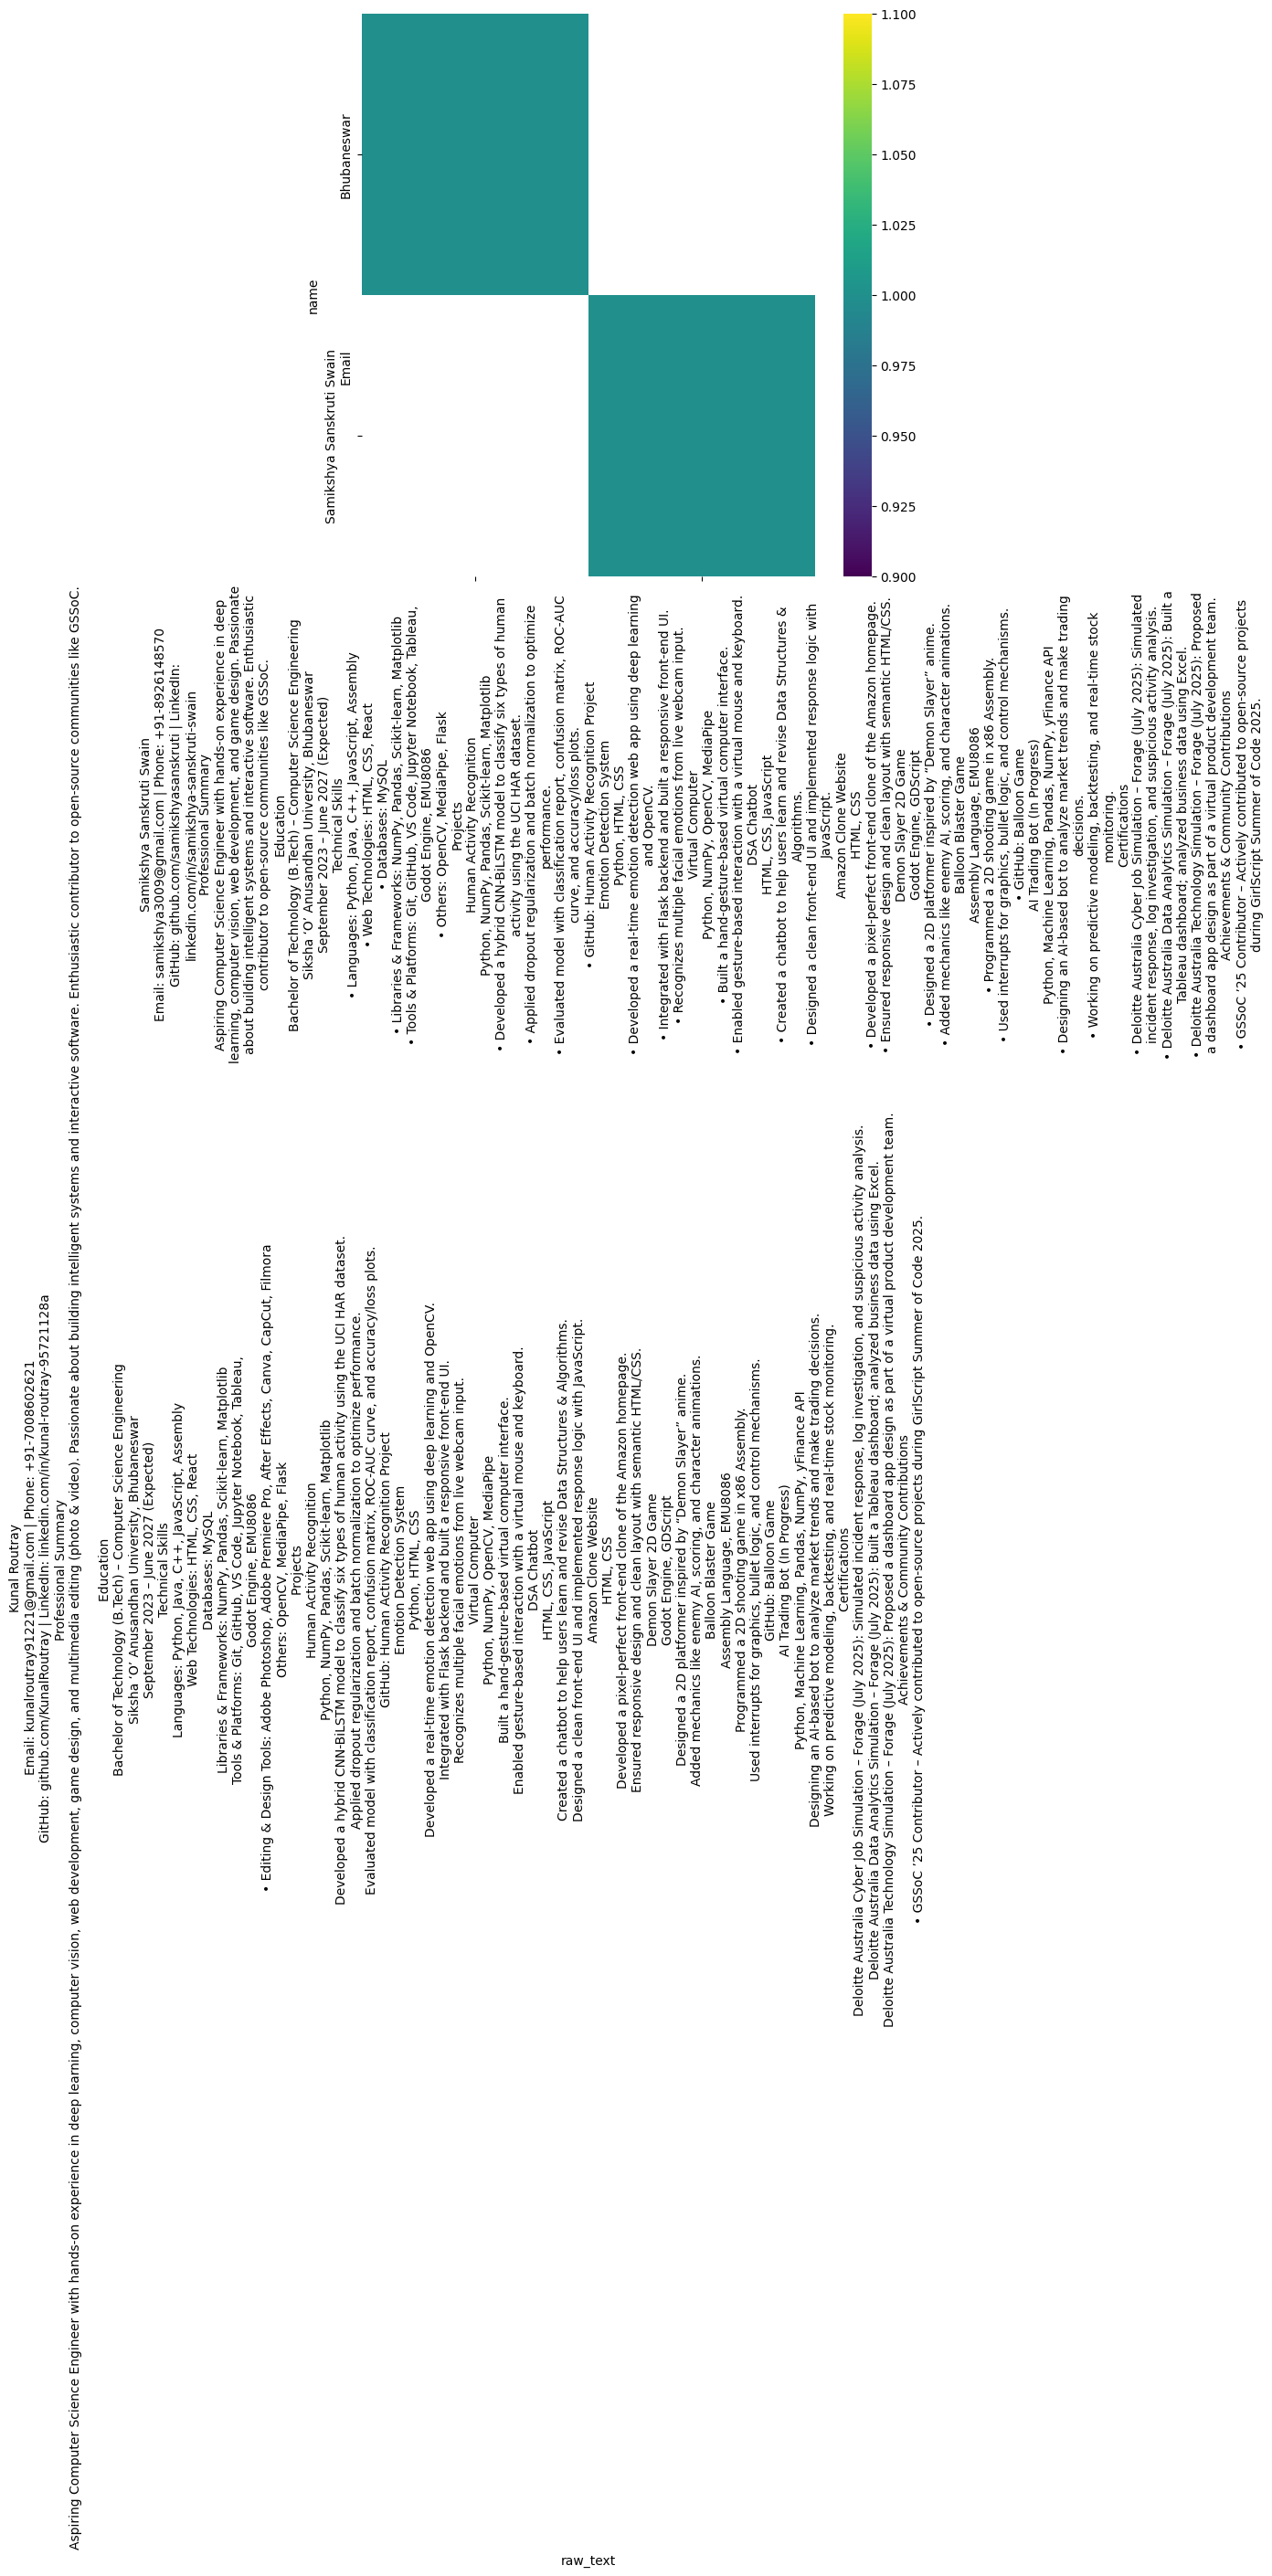

In [16]:
# @title raw_text vs name

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['name'].value_counts()
    for x_label, grp in df.groupby('raw_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('raw_text')
_ = plt.ylabel('name')